In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sparkyxt/calories-burning-dataset")

print("Path to dataset files:", path)

100%|██████████| 296k/296k [00:00<00:00, 61.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sparkyxt/calories-burning-dataset/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [4]:
exer=pd.read_csv('/root/.cache/kagglehub/datasets/sparkyxt/calories-burning-dataset/versions/1/exercise.csv')
cal=pd.read_csv('/root/.cache/kagglehub/datasets/sparkyxt/calories-burning-dataset/versions/1/calories.csv')

In [5]:
exer.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
exer.shape

(15000, 8)

In [7]:
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
cal.shape

(15000, 2)

#I need to combine them into a single dataframe

In [26]:
df=pd.concat([exer,cal['Calories']],axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [27]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


#I'll do some data visulaization

<Axes: xlabel='Gender', ylabel='count'>

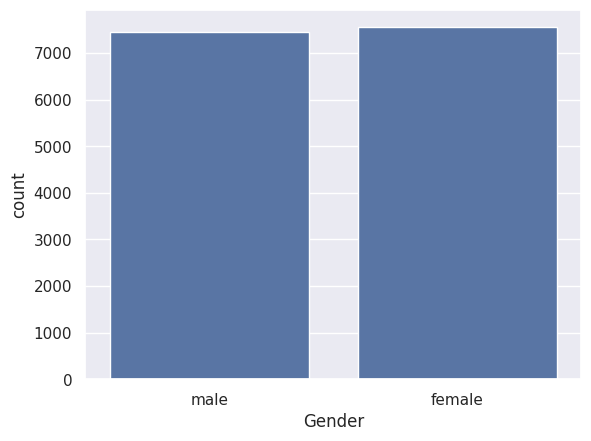

In [28]:
sns.set()
sns.countplot(x=df['Gender'])

/tmp/ipython-input-29-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

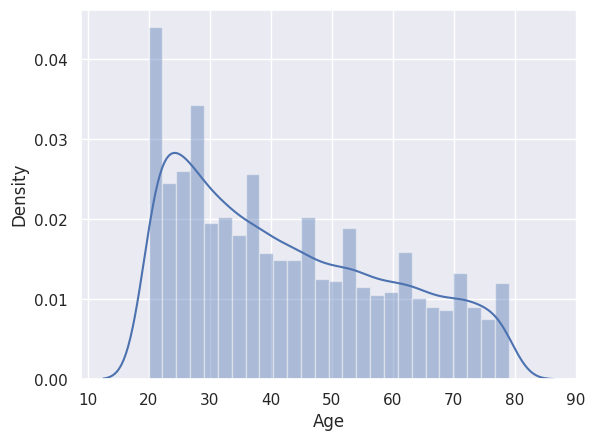

In [29]:
sns.distplot(df['Age'])

/tmp/ipython-input-30-3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

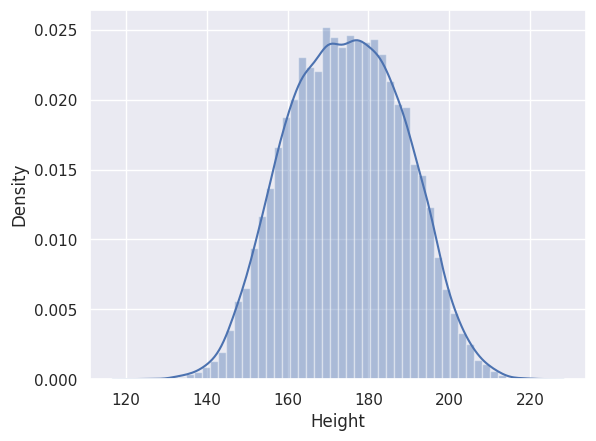

In [30]:
sns.distplot(df['Height'])

/tmp/ipython-input-31-1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

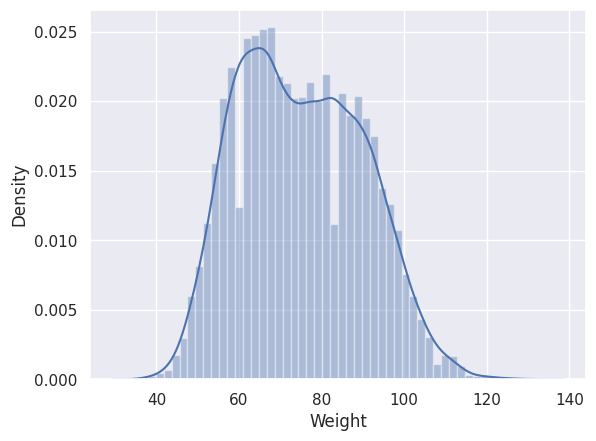

In [31]:
sns.distplot(df['Weight'])

In [32]:
df.replace({"Gender":{'male':0,'female':1}}, inplace=True)

/tmp/ipython-input-32-1148088960.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [33]:
corrlation=df.corr()['Calories'].sort_values(ascending=False)
corrlation

,Calories
Calories,1.000000
Duration,0.955421
Heart_Rate,0.897882
Body_Temp,0.824558
Age,0.154395
Weight,0.035481
Height,0.017537
User_ID,-0.001661
Gender,-0.022357


<Axes: >

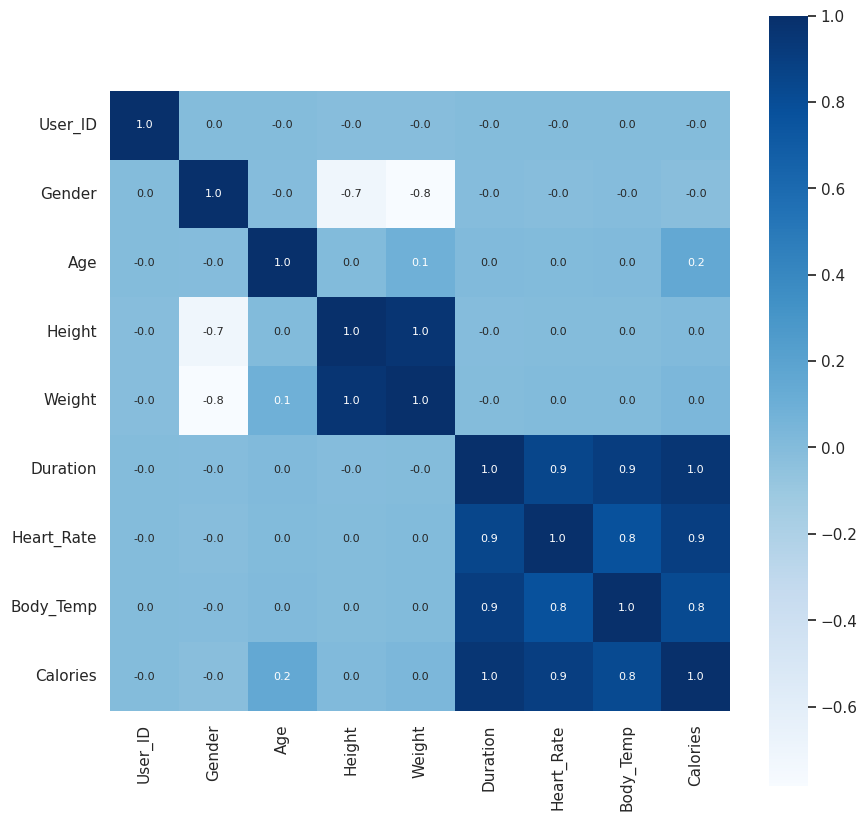

In [35]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [36]:
X = df.drop(columns=['User_ID','Calories'], axis=1)
Y = df['Calories']


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [40]:
models=[LinearRegression(),Lasso(), XGBRegressor(),RandomForestRegressor()]

def compare_models(X_train, X_test, Y_train, Y_test):

  for model in models:
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print(f"R2 for {model.__class__.__name__} is  ", r2_score(Y_test, Y_pred))
    print("----------"*40)

    plt.figure(figsize=(6, 6))
    plt.scatter(Y_test, Y_pred, color='skyblue', edgecolors='black')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # perfect prediction line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model.__class__.__name__}\nActual vs Predicted (R² = {r2_score(Y_test, Y_pred):.2f})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


R2 for LinearRegression is   0.9668790377181355
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


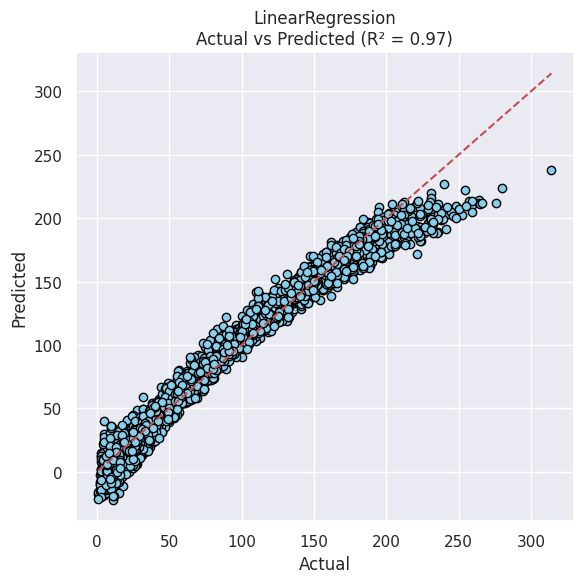

R2 for Lasso is   0.9643872931114373
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


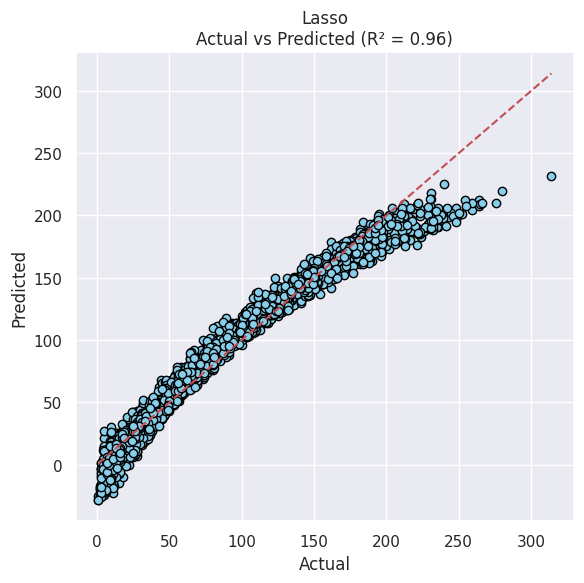

R2 for XGBRegressor is   0.998800624504713
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


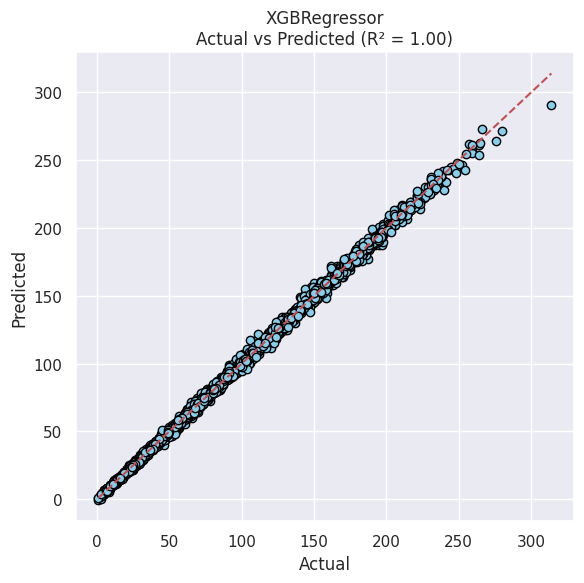

R2 for RandomForestRegressor is   0.9981710260702609
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


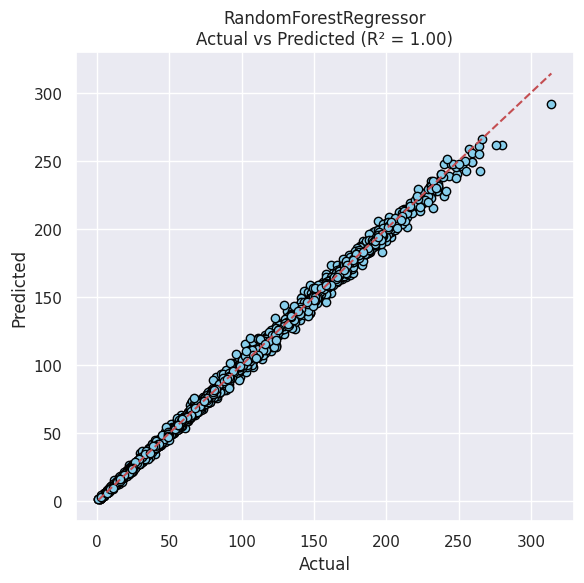

In [41]:
compare_models(X_train, X_test, Y_train, Y_test)

In [44]:
def compare_models_cross_val(X,Y):
    model_names = []
    mean_scores = []

    for model in models:
      name=model.__class__.__name__
      model_names.append(name)
      scores = cross_val_score(model, X, Y, cv=5)
      avg_score = np.mean(scores)
      mean_scores.append(avg_score)

      print(f"Cross-validation scores for {name}: {np.round(scores,2)}")
      print(f"Average CV score for {model.__class__.__name__}: {np.round(avg_score,2)}")
      print("------------" * 40)

    plt.figure(figsize=(8, 5))
    bars=plt.bar( model_names,mean_scores, color="y")
    plt.bar_label( bars, fmt="%.2f")
    plt.title("Average Cross-Validation R² Scores")
    plt.xlabel("Model")
    plt.ylabel("Average R² Score")


plt.show()


Cross-validation scores for LinearRegression: [0.97 0.97 0.97 0.97 0.97]
Average CV score for LinearRegression: 0.97
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Cross-validation scores for Lasso: [0.96 0.96 0.97 0.97 0.96]
Average CV score for Lasso: 0.96
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

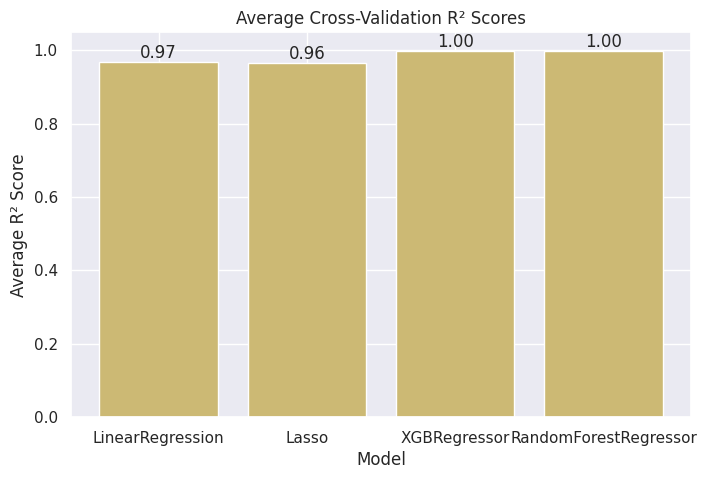

In [45]:
compare_models_cross_val(X,Y)

### 📝 Model Selection Note

I intentionally tried different regression models, including complex ones like **XGBRegressor** and **RandomForestRegressor**, to see if they would overfit on this dataset.

Both of these models achieved a perfect **R² score of 1.0** during cross-validation. While this may seem impressive, it likely indicates **overfitting**, possibly due to the simplicity of the dataset or the presence of a highly predictive feature like **`Duration`**.

For that reason, I decided to stick with simpler models like **LinearRegression** and **Lasso**, which gave slightly lower (but still very high) R² scores — around **0.96–0.97** — and are more likely to **generalize well** on unseen data.

😊🚀🚀🚀